In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon_reviews.csv', low_memory=False)
print("Data loaded successfully.")
print(df[['reviews.text', 'reviews.rating']].head())  # Preview relevant columns

# Total reviews
print("Total reviews:", len(df))

# Average review length
df['review_length'] = df['reviews.text'].astype(str).apply(len)
print("Average review length:", df['review_length'].mean())

# Rating distribution
print("Rating distribution:\n", df['reviews.rating'].value_counts())


Data loaded successfully.
                                        reviews.text  reviews.rating
0  This product so far has not disappointed. My c...             5.0
1  great for beginner or experienced person. Boug...             5.0
2  Inexpensive tablet for him to use and learn on...             5.0
3  I've had my Fire HD 8 two weeks now and I love...             4.0
4  I bought this for my grand daughter when she c...             5.0
Total reviews: 2356
Average review length: 151.9927843803056
Rating distribution:
 reviews.rating
5.0    1575
4.0     665
3.0      72
2.0      24
1.0      19
Name: count, dtype: int64


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)

df['processed_text'] = df['reviews.text'].apply(clean_text)
print(df[['reviews.text', 'processed_text']].head())


                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                      processed_text  
0  product far disappointed children love use lik...  
1  great beginner experienced person bought gift ...  
2  inexpensive tablet use learn step nabi thrille...  
3  ive fire hd two weeks love tablet great valuew...  
4  bought grand daughter comes visit set user ent...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def get_sentiment_label(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_label'] = df['reviews.rating'].apply(get_sentiment_label)
print(df[['reviews.rating', 'sentiment_label']].head())


   reviews.rating sentiment_label
0             5.0        Positive
1             5.0        Positive
2             5.0        Positive
3             4.0        Positive
4             5.0        Positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])  # Features
y = df['sentiment_label']                           # Labels



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert cleaned text into numerical features
vectorizer = TfidfVectorizer()

# Fit on processed text and transform it
X = vectorizer.fit_transform(df['processed_text'])  # This is your feature matrix
y = df['sentiment_label']  # Target variable (Positive, Neutral, Negative)

# You can check the shape of the matrix (reviews x unique words)
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (2356, 3759)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Import the SVC class
from sklearn.svm import SVC
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report (Naive Bayes):\n", classification_report(y_test, nb_pred))

# Model 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, lr_pred))

# Model 3: SVM
svm = SVC()  # You can adjust parameters like kernel, C, etc.
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report (SVM):\n", classification_report(y_test, svm_pred))

# Model 4: Random Forest
rf = RandomForestClassifier()  # You can adjust parameters like n_estimators, max_depth, etc.
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_pred))

Naive Bayes Accuracy: 0.9661016949152542
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.00      0.00      0.00        11
    Positive       0.97      1.00      0.98       456

    accuracy                           0.97       472
   macro avg       0.32      0.33      0.33       472
weighted avg       0.93      0.97      0.95       472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.9661016949152542
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.00      0.00      0.00        11
    Positive       0.97      1.00      0.98       456

    accuracy                           0.97       472
   macro avg       0.32      0.33      0.33       472
weighted avg       0.93      0.97      0.95       472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.9661016949152542
Classification Report (SVM):
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.00      0.00      0.00        11
    Positive       0.97      1.00      0.98       456

    accuracy                           0.97       472
   macro avg       0.32      0.33      0.33       472
weighted avg       0.93      0.97      0.95       472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.9661016949152542
Classification Report (Random Forest):
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.00      0.00      0.00        11
    Positive       0.97      1.00      0.98       456

    accuracy                           0.97       472
   macro avg       0.32      0.33      0.33       472
weighted avg       0.93      0.97      0.95       472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

stop_words = set(stopwords.words('english'))

custom_stopwords = {"amazon", "prime", "order", "delivery", "item", "app", "product"}
stop_words.update(custom_stopwords)

lemmatizer = WordNetLemmatizer()

def process(text):
    words = word_tokenize(text)
    tokens= [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(tokens)

# Change 'cleaned_content' to 'processed_text' or 'reviews.text'
df['no_stopwords'] = df['processed_text'].apply(process)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,review_length,processed_text,sentiment_label,no_stopwords
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,143,product far disappointed children love use lik...,Positive,far disappointed child love use like ability m...
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,75,great beginner experienced person bought gift ...,Positive,great beginner experienced person bought gift ...
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,131,inexpensive tablet use learn step nabi thrille...,Positive,inexpensive tablet use learn step nabi thrille...
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,593,ive fire hd two weeks love tablet great valuew...,Positive,ive fire hd two week love tablet great valuewe...
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,613,bought grand daughter comes visit set user ent...,Positive,bought grand daughter come visit set user ente...


In [ ]:
def label_sentiment(rating):
  if rating > 4:
    return 'positive'  # Corrected the typo "positive" to 'positive'
  elif rating == 3:
    return 'neutral'
  else:
    return 'negative'

df['sentiment'] = df['reviews.rating'].apply(label_sentiment)

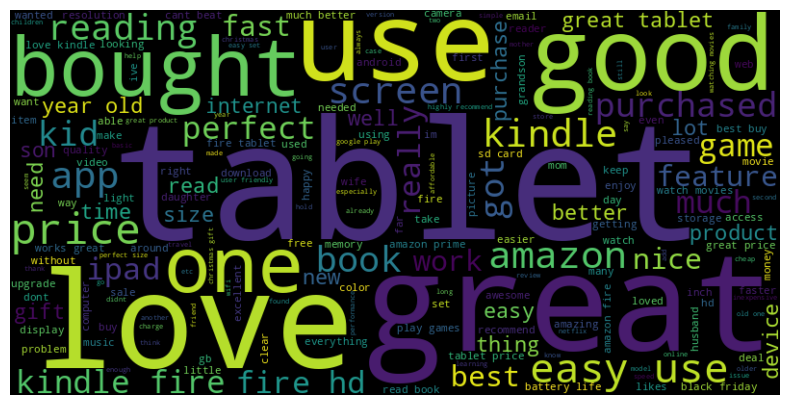

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'processed_text' contains the cleaned text
positive_words = ' '.join(df[df['sentiment'] == 'positive']['processed_text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400).generate(positive_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

# Change 'cleaned_text' to 'processed_text'
X = vectorizer.fit_transform(df['processed_text'])

y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'X' and 'y' are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

    negative       0.53      0.23      0.32       128
     neutral       0.00      0.00      0.00        11
    positive       0.74      0.93      0.83       333

    accuracy                           0.72       472
   macro avg       0.42      0.39      0.38       472
weighted avg       0.67      0.72      0.67       472

Accuracy: 0.7182203389830508


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenization
tokenizer = Tokenizer(num_words=20000)  # Create a tokenizer
tokenizer.fit_on_texts(df['processed_text'])  # Fit on your processed text

# Text to Sequences
X_seq = tokenizer.texts_to_sequences(df['processed_text'])  # Convert text to sequences

# Padding
X_padded = pad_sequences(X_seq, maxlen=200)  # Pad sequences to a fixed length

# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment_label'])  # Encode sentiment labels

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(20000, 128, input_length=200),
    LSTM(64),
    Dense(3, activation='softmax')  # Assuming 3 sentiment classes
]) q

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_padded, y_encoded, epochs=10, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.9265 - loss: 0.4958 - val_accuracy: 0.9407 - val_loss: 0.2586
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9518 - loss: 0.2175 - val_accuracy: 0.9407 - val_loss: 0.2554
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9480 - loss: 0.2037 - val_accuracy: 0.9407 - val_loss: 0.2527
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.9539 - loss: 0.1382 - val_accuracy: 0.9386 - val_loss: 0.3656
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9850 - loss: 0.0536 - val_accuracy: 0.9237 - val_loss: 0.3481
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9926 - loss: 0.0316 - val_accuracy: 0.9237 - val_loss: 0.4174
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.9981 - loss: 0.0175 - val_accuracy: 0.9258 - val_loss: 0.4650
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.9999 - loss: 0.0056 - val_accu

In [ ]:
print(df["Sentiment"].value_counts())


Sentiment
Positive    32349
Neutral      1499
Negative      812
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Downsample the majority class
df_majority = df[df["Sentiment"] == "Positive"]
df_minority1 = df[df["Sentiment"] == "Negative"]
df_minority2 = df[df["Sentiment"] == "Neutral"]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority1),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority1, df_minority2])


In [ ]:
def get_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"


In [ ]:
print(y_train.value_counts())


Sentiment
Positive    25856
Neutral      1221
Negative      651
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import pickle

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search with RandomForest
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Save model and vectorizer
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9371032890940566


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok

In [ ]:
from sklearn.utils import resample

# Separate classes
df_positive = df[df["Sentiment"] == "Positive"]
df_neutral = df[df["Sentiment"] == "Neutral"]
df_negative = df[df["Sentiment"] == "Negative"]

# Find the smallest class count
min_count = min(len(df_positive), len(df_neutral), len(df_negative))

# Downsample all to the same count
df_balanced = pd.concat([
    resample(df_positive, replace=False, n_samples=min_count, random_state=42),
    resample(df_neutral, replace=False, n_samples=min_count, random_state=42),
    resample(df_negative, replace=False, n_samples=min_count, random_state=42)
])

print(df_balanced["Sentiment"].value_counts())  # Check it's balanced now


Sentiment
Positive    812
Neutral     812
Negative    812
Name: count, dtype: int64


In [ ]:
X_raw = df_balanced['reviews.text']  # Use 'reviews.text' instead of 'processed_text'
y = df_balanced["Sentiment"]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Unigrams + Bigrams
X = vectorizer.fit_transform(X_raw)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.57      0.73      0.64       146
     Neutral       0.52      0.46      0.49       166
    Positive       0.77      0.68      0.73       176

    accuracy                           0.62       488
   macro avg       0.62      0.62      0.62       488
weighted avg       0.63      0.62      0.62       488



In [ ]:
import pickle
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [ ]:
%%writefile app.py
import streamlit as st
import pickle

# Load model and vectorizer
with open("sentiment_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)

st.title("🛍️ Amazon Review Sentiment Analyzer")

st.header("Enter a Product Review:")

review_text = st.text_area("Type or paste a review here...")

if st.button("Analyze Sentiment"):
    if review_text.strip() == "":
        st.warning("Please enter a review.")
    else:
        # Transform input text
        review_vector = vectorizer.transform([review_text])
        prediction = model.predict(review_vector)[0]

        st.success(f"🧠 Predicted Sentiment: **{prediction}**")
        if prediction == "Positive":
            st.balloons()
        elif prediction == "Negative":
            st.error("This seems to be a negative review.")
        elif prediction == "Neutral":
            st.info("This review feels neutral.")


Overwriting app.py


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_model (1) (1).pkl to sentiment_model (1) (1) (1).pkl


In [ ]:
!ngrok config add-authtoken 2vZzVPumXqHaXZ7Ye1SwE8iegtS_fgu2Dtt6o12M5cAcEZh4

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Kill any existing ngrok tunnel
!pkill ngrok

from pyngrok import ngrok

# Disconnect any existing tunnels (cleaner approach)
ngrok.kill()

# Start a new HTTP tunnel for Streamlit on port 8501
public_url = ngrok.connect(addr="8501")
print(f"🚀 Your Streamlit app is live at: {public_url}")


🚀 Your Streamlit app is live at: NgrokTunnel: "https://b053-34-125-171-119.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# Kill any existing ngrok processes
!pkill ngrok

from pyngrok import ngrok
import threading
import os

# Ensure clean tunnel start
ngrok.kill()

# Start the ngrok tunnel on port 8501
public_url = ngrok.connect(addr="8501")
print("🚀 Public URL:", public_url)

# Define function to launch Streamlit app
def run_streamlit():
    os.system("streamlit run app.py")

# Run Streamlit in a separate thread
thread = threading.Thread(target=run_streamlit)
thread.start()


🚀 Public URL: NgrokTunnel: "https://d8de-34-125-171-119.ngrok-free.app" -> "http://localhost:8501"
